In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import networkx as nx

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [5]:
G = nx.Graph()
G.add_nodes_from(['A','B','C','D','E','F','G','H'])
G.add_edge('A','B', weight = 8 )
G.add_edge('A','C', weight = 2)
G.add_edge('A','D', weight = 5)
G.add_edge('B','D', weight = 2)
G.add_edge('B','F', weight = 13)
G.add_edge('D','F', weight = 6)
G.add_edge('D','G', weight = 3)
G.add_edge('D','E', weight = 1)
G.add_edge('D','C', weight = 2)
G.add_edge('C','E', weight = 5)
G.add_edge('E','G', weight = 1)
G.add_edge('G','F', weight = 2)
G.add_edge('G','H', weight = 6)
G.add_edge('F','H', weight = 3)


In [51]:
print(G.node['A'])

{}


In [52]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 14
Average degree:   3.5000


In [53]:
print(G.degree())

[('A', 3), ('B', 3), ('C', 3), ('D', 6), ('E', 3), ('F', 4), ('G', 4), ('H', 2)]


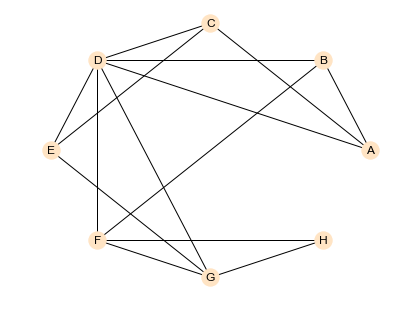

In [54]:
nx.draw_circular(G, node_color='bisque', with_labels=True)

In [55]:
list(G.neighbors('A'))

['B', 'C', 'D']

In [56]:
nx.dijkstra_path(G,'A','H')
#Link de Dijkstra Algorithm
#https://www.youtube.com/watch?v=5GT5hYzjNoo

['A', 'C', 'D', 'E', 'G', 'F', 'H']

In [57]:
list(nx.dfs_edges(G,'A'))
#Link de Breadth First Search Algorithm
#https://www.youtube.com/watch?v=s-CYnVz-uh4&t=1551s

[('A', 'B'),
 ('B', 'D'),
 ('D', 'F'),
 ('F', 'G'),
 ('G', 'E'),
 ('E', 'C'),
 ('G', 'H')]

In [58]:
G.get_edge_data('A','B')['weight']


8

In [59]:
def dfs(G, v):
    nodes = [v]
    visited=set()
    for start in nodes:
        if start in visited:
             continue
        visited.add(start)
        stack = [(start,iter(G[start]))]
        while stack:
            parent,children = stack[-1]
            try:
                child = next(children)
                if child not in visited:
                    yield parent,child
                    visited.add(child)
                    stack.append((child,iter(G[child])))
            except StopIteration:
                stack.pop()
                
path = dfs(G,'A')
for p in path:
    print(p, end = ' ')

('A', 'B') ('B', 'D') ('D', 'F') ('F', 'G') ('G', 'E') ('E', 'C') ('G', 'H') 

In [60]:
list(G.nodes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [61]:
list(G.edges('A'))

[('A', 'B'), ('A', 'C'), ('A', 'D')]

In [62]:
math.inf > 3

True

In [71]:
def dijsktra_path(G, v, d):
  visited = {v : 0}
  path = {}

  nodes = set(list(G.nodes))

  while nodes: 
    min_node = None
    for node in nodes:
      if node in visited:
        if min_node is None:
          min_node = node
        elif visited[node] < visited[min_node]:
          min_node = node

    if min_node is None:
      break

    nodes.remove(min_node)
    current_weight = visited[min_node]

    for edge in G.edges(min_node):
      peso = current_weight + G.get_edge_data(min_node, edge)
      if edge not in visited or weight < visited[edge]:
        visited[edge] = peso
        path[edge] = min_node

  return visited, path 

nx.dijkstra_path(G,'A','H')

['A', 'C', 'D', 'E', 'G', 'F', 'H']

In [8]:
#DFS

#grafo = {'a':['b','c'], 'b':['c','d'],'c':['b','d']}
grafo = {'a':['b','c'], 'b':['d','c'],'c':['b','d'], 'd':[]}

def dfs(u,graph, visited=[]):
    if u not in visited:
        visited.append(u)
        for i in graph[u]:
            if i not in visited:
                dfs(i,graph,visited)
    return visited

print(dfs('a',grafo))

['a', 'b', 'd', 'c']
